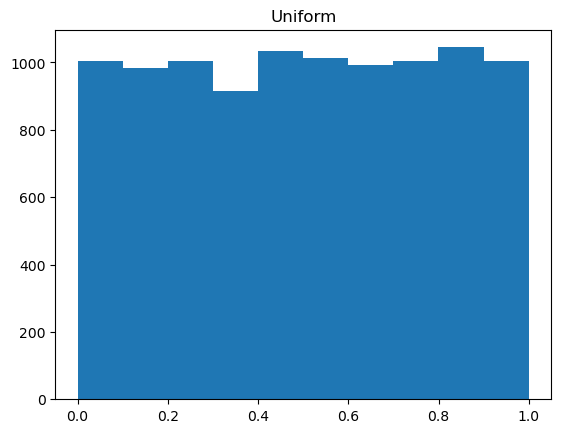

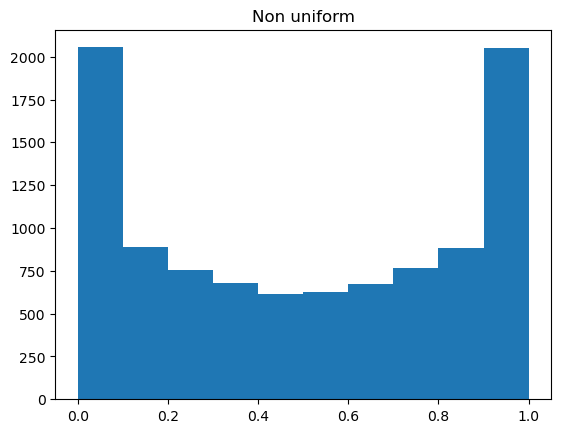

In [1]:
using DataStructures
using Statistics
using Distributions
using PyPlot

include("graph.jl")
include("prim.jl")
include("kruskal.jl")
include("utils.jl")

hist(rand(10000))
title("Uniform")
display(gcf())
clf()
hist([myDist() for _ in 1:10000])
title("Non uniform")
display(gcf())
clf()

In [ ]:
nMin = 100
nMax = 1000
step = 30
reps = 500

N = [n for n in nMin:step:nMax]

struct Record
    n::Int
    time::Float64
    weight::Float64
end

recordsPrimUni = Vector{Vector{Record}}()
recordsKruskalUni = Vector{Vector{Record}}()

recordsPrimMy = Vector{Vector{Record}}()
recordsKruskalMy = Vector{Vector{Record}}()

for n in N
    println(n)
    primVectUni = Vector{Record}()
    kruskalVectUni = Vector{Record}()
    primVectMy = Vector{Record}()
    kruskalVectMy = Vector{Record}()
    for _ in 1:reps
        gUni = genGraph(n, rand)
        gMy = genGraph(n, myDist)
        time = @elapsed t = prim(gUni)
        push!(primVectUni, Record(n, time, getTreeWeight(t)))

        time = @elapsed t = prim(gUni)
        push!(kruskalVectUni, Record(n, time, getTreeWeight(t)))

        time = @elapsed t = prim(gMy)
        push!(primVectMy, Record(n, time, getTreeWeight(t)))

        time = @elapsed t = prim(gMy)
        push!(kruskalVectMy, Record(n, time, getTreeWeight(t)))
    end
    push!(recordsPrimUni, primVectUni)
    push!(recordsKruskalUni, kruskalVectUni)
    push!(recordsPrimMy, primVectMy)
    push!(recordsKruskalMy, kruskalVectMy)
end

In [ ]:
struct Parameters
    minT::Float64
    maxT::Float64
    meanT::Float64
    experiment::Float64
    chebyshev::Float64
    kurtozis::Float64
end

function getTimes(records)
    times = [r.time for r in records]
    minTime = minimum(times)
    maxTime = maximum(times)
    E = mean(times)
    times_diff = [abs(t - E) for t in times]
    experiment = sort(times_diff)[Int(floor(0.95 * length(times)))]
    V = var(times)
    chebyshev = sqrt(V/0.05)
    kurt = kurtosis(times)

    return Parameters(minTime, maxTime, E, experiment, chebyshev, kurt)
end

timesPrimUni = [getTimes(recordsPrimUni[i]) for i in 1:length(N)]
timesKruskalUni = [getTimes(recordsKruskalUni[i]) for i in 1:length(N)]
timesPrimMy = [getTimes(recordsPrimMy[i]) for i in 1:length(N)]
timesKruskalMy = [getTimes(recordsKruskalMy[i]) for i in 1:length(N)]

### Time plots

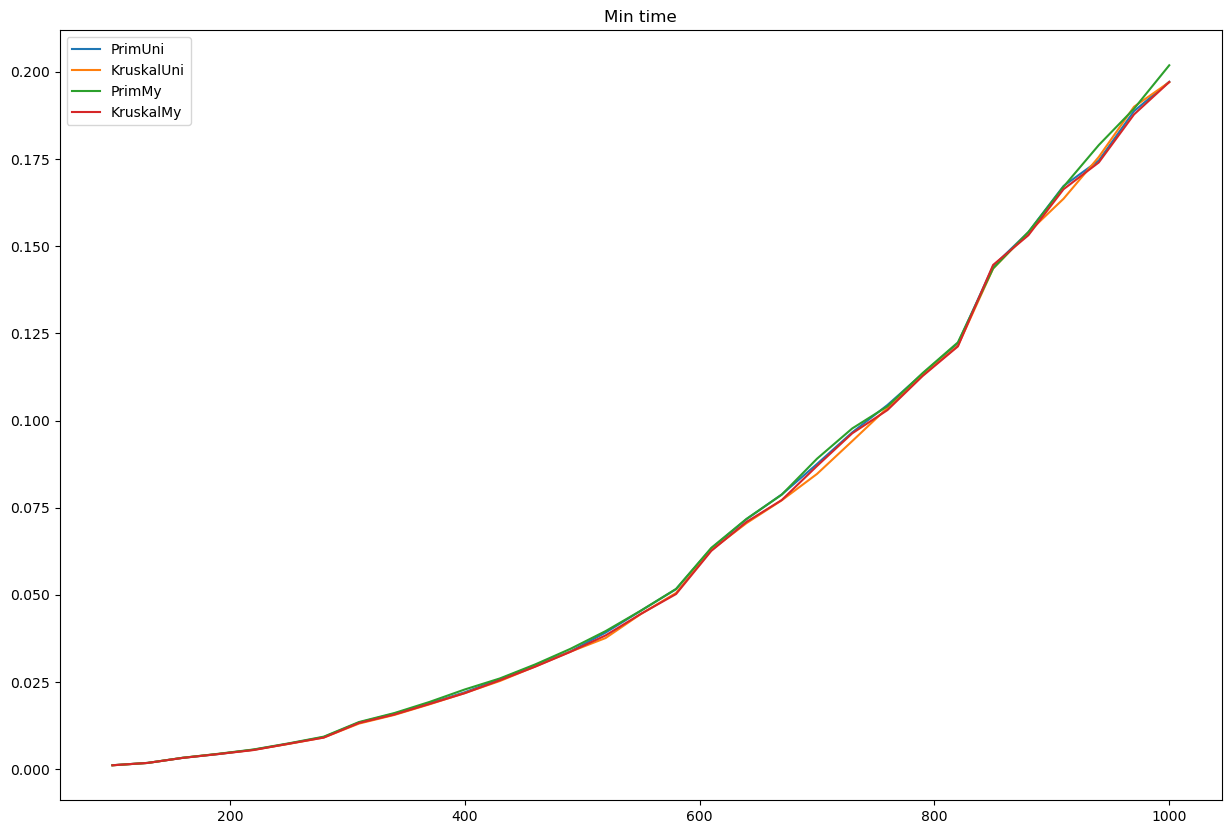

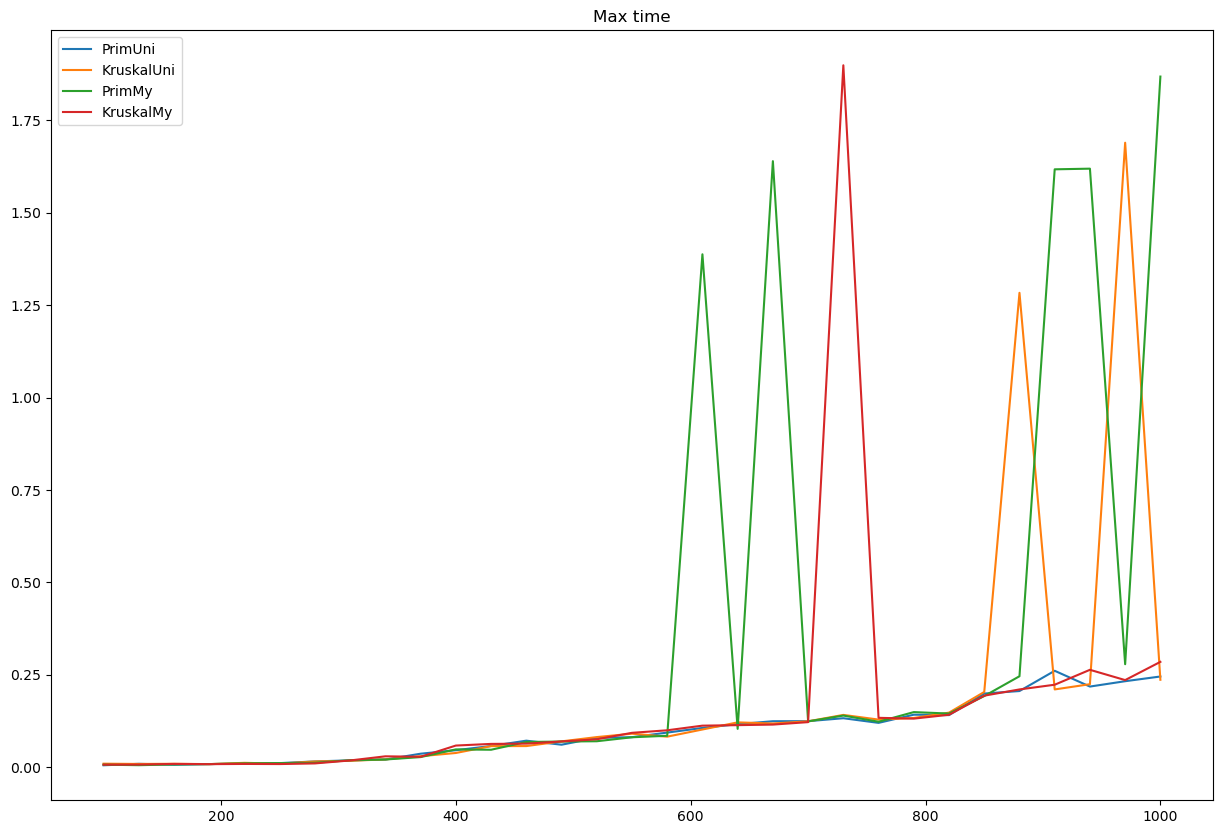

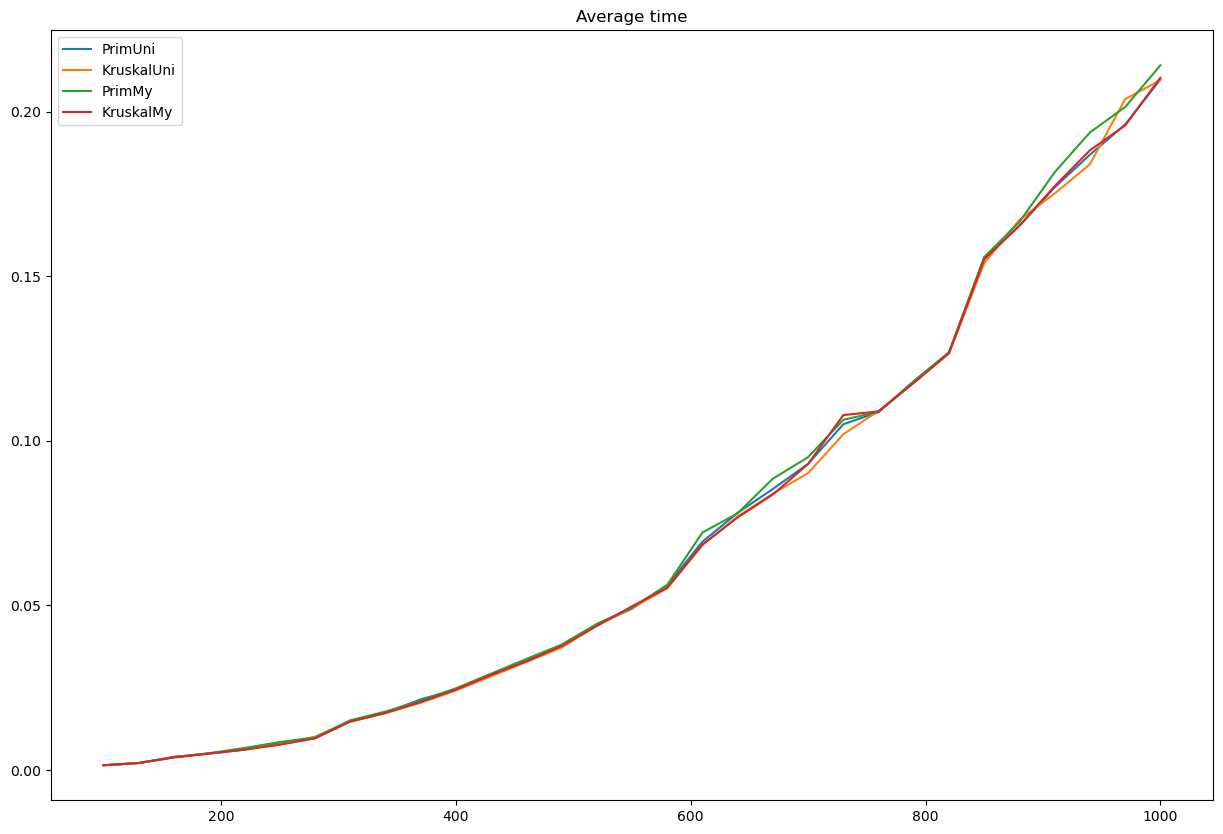

In [4]:
figure(figsize=(15,10))
plot(N,[t.minT for t in timesPrimUni], label="PrimUni")
plot(N,[t.minT for t in timesKruskalUni], label="KruskalUni")
plot(N,[t.minT for t in timesPrimMy], label="PrimMy")
plot(N,[t.minT for t in timesKruskalMy], label="KruskalMy")
title("Min time")
legend()
display(gcf())
clf()

plot(N,[t.maxT for t in timesPrimUni], label="PrimUni")
plot(N,[t.maxT for t in timesKruskalUni], label="KruskalUni")
plot(N,[t.maxT for t in timesPrimMy], label="PrimMy")
plot(N,[t.maxT for t in timesKruskalMy], label="KruskalMy")
title("Max time")
legend()
display(gcf())
clf()

plot(N,[t.meanT for t in timesPrimUni], label="PrimUni")
plot(N,[t.meanT for t in timesKruskalUni], label="KruskalUni")
plot(N,[t.meanT for t in timesPrimMy], label="PrimMy")
plot(N,[t.meanT for t in timesKruskalMy], label="KruskalMy")
title("Average time")
legend()
display(gcf())
clf()

### Concentration plots

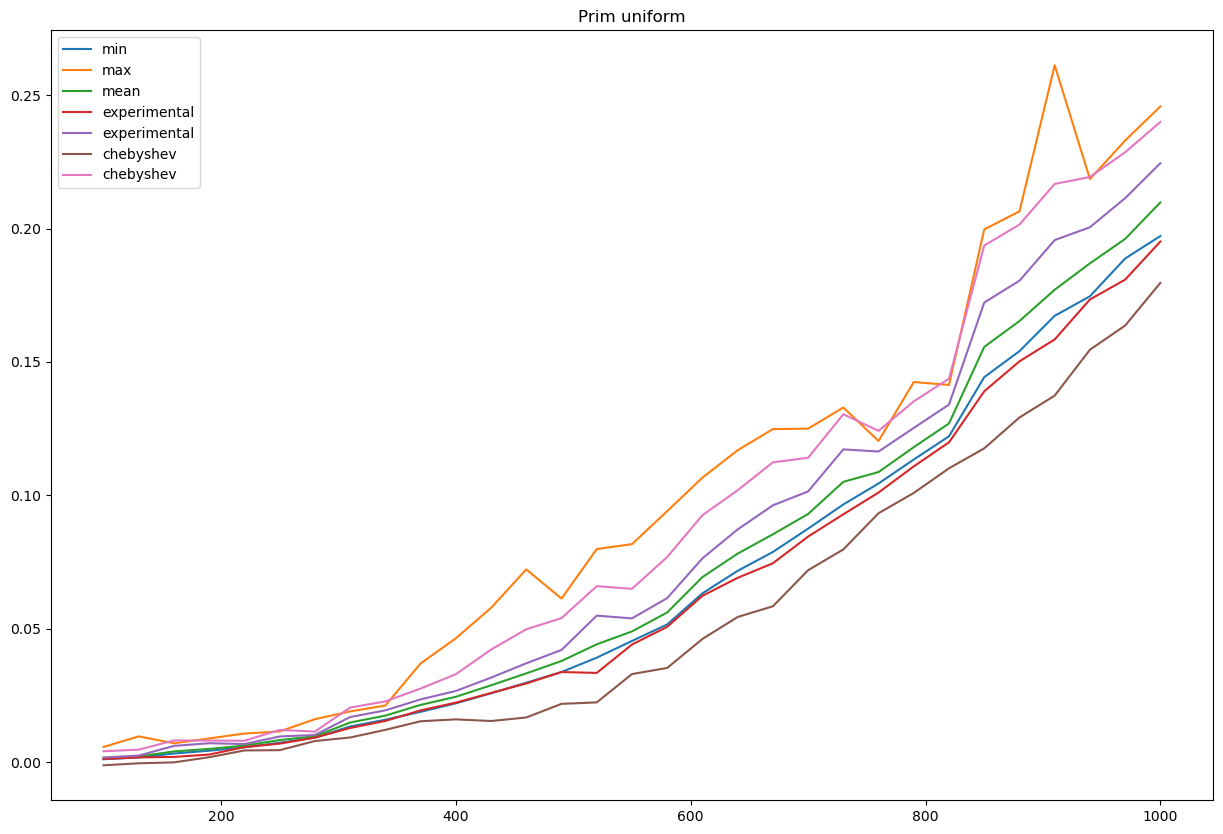

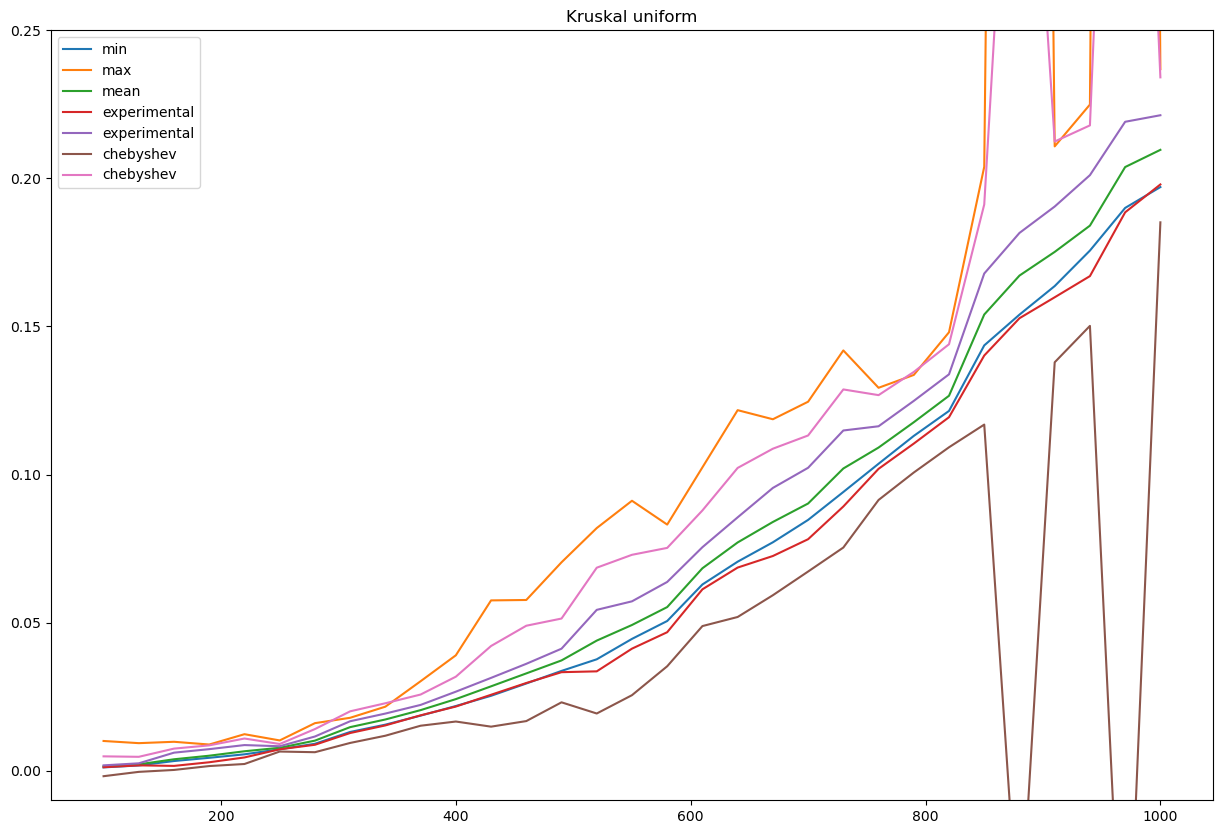

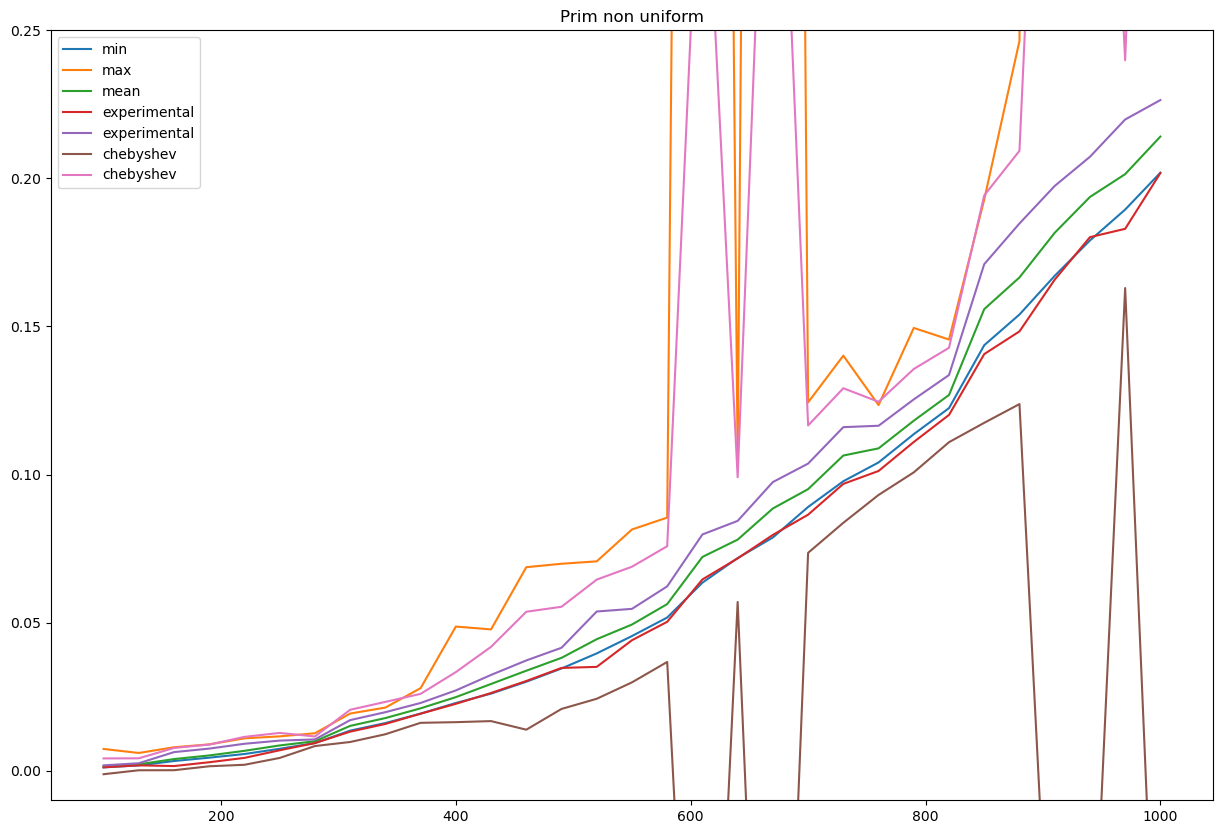

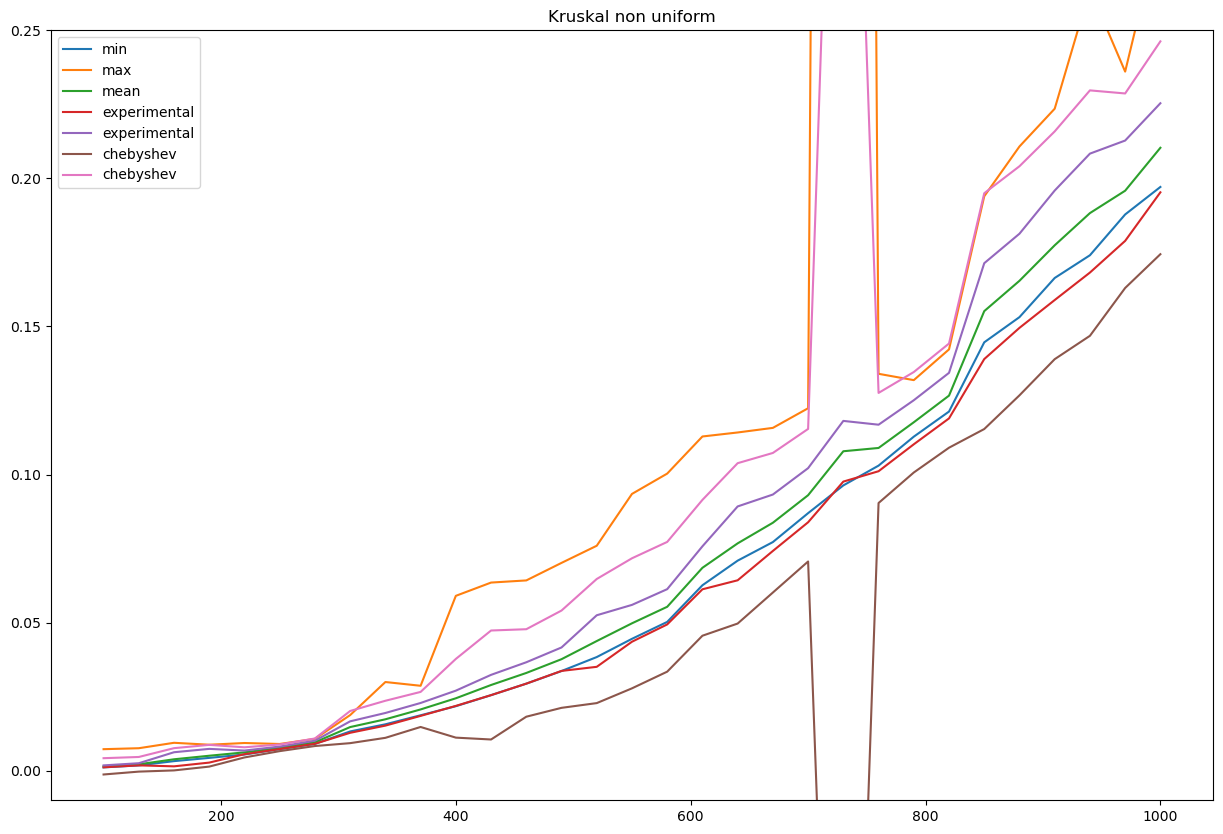

In [12]:
plot(N,[t.minT for t in timesPrimUni], label="min")
plot(N,[t.maxT for t in timesPrimUni], label="max")
plot(N,[t.meanT for t in timesPrimUni], label="mean")
plot(N,[t.meanT - t.experiment for t in timesPrimUni], label="experimental")
plot(N,[t.meanT + t.experiment for t in timesPrimUni], label="experimental")
plot(N,[t.meanT - t.chebyshev for t in timesPrimUni], label="chebyshev")
plot(N,[t.meanT + t.chebyshev for t in timesPrimUni], label="chebyshev")
title("Prim uniform")
legend()
display(gcf())
clf()

plot(N,[t.minT for t in timesKruskalUni], label="min")
plot(N,[t.maxT for t in timesKruskalUni], label="max")
plot(N,[t.meanT for t in timesKruskalUni], label="mean")
plot(N,[t.meanT - t.experiment for t in timesKruskalUni], label="experimental")
plot(N,[t.meanT + t.experiment for t in timesKruskalUni], label="experimental")
plot(N,[t.meanT - t.chebyshev for t in timesKruskalUni], label="chebyshev")
plot(N,[t.meanT + t.chebyshev for t in timesKruskalUni], label="chebyshev")
ylim(bottom=-0.01, top=0.25)
title("Kruskal uniform")
legend()
display(gcf())
clf()

plot(N,[t.minT for t in timesPrimMy], label="min")
plot(N,[t.maxT for t in timesPrimMy], label="max")
plot(N,[t.meanT for t in timesPrimMy], label="mean")
plot(N,[t.meanT - t.experiment for t in timesPrimMy], label="experimental")
plot(N,[t.meanT + t.experiment for t in timesPrimMy], label="experimental")
plot(N,[t.meanT - t.chebyshev for t in timesPrimMy], label="chebyshev")
plot(N,[t.meanT + t.chebyshev for t in timesPrimMy], label="chebyshev")
ylim(bottom=-0.01, top=0.25)
title("Prim non uniform")
legend()
display(gcf())
clf()

plot(N,[t.minT for t in timesKruskalMy], label="min")
plot(N,[t.maxT for t in timesKruskalMy], label="max")
plot(N,[t.meanT for t in timesKruskalMy], label="mean")
plot(N,[t.meanT - t.experiment for t in timesKruskalMy], label="experimental")
plot(N,[t.meanT + t.experiment for t in timesKruskalMy], label="experimental")
plot(N,[t.meanT - t.chebyshev for t in timesKruskalMy], label="chebyshev")
plot(N,[t.meanT + t.chebyshev for t in timesKruskalMy], label="chebyshev")
ylim(bottom=-0.01, top=0.25)
title("Kruskal non uniform")
legend()
display(gcf())
clf()

### Kurtozis plot

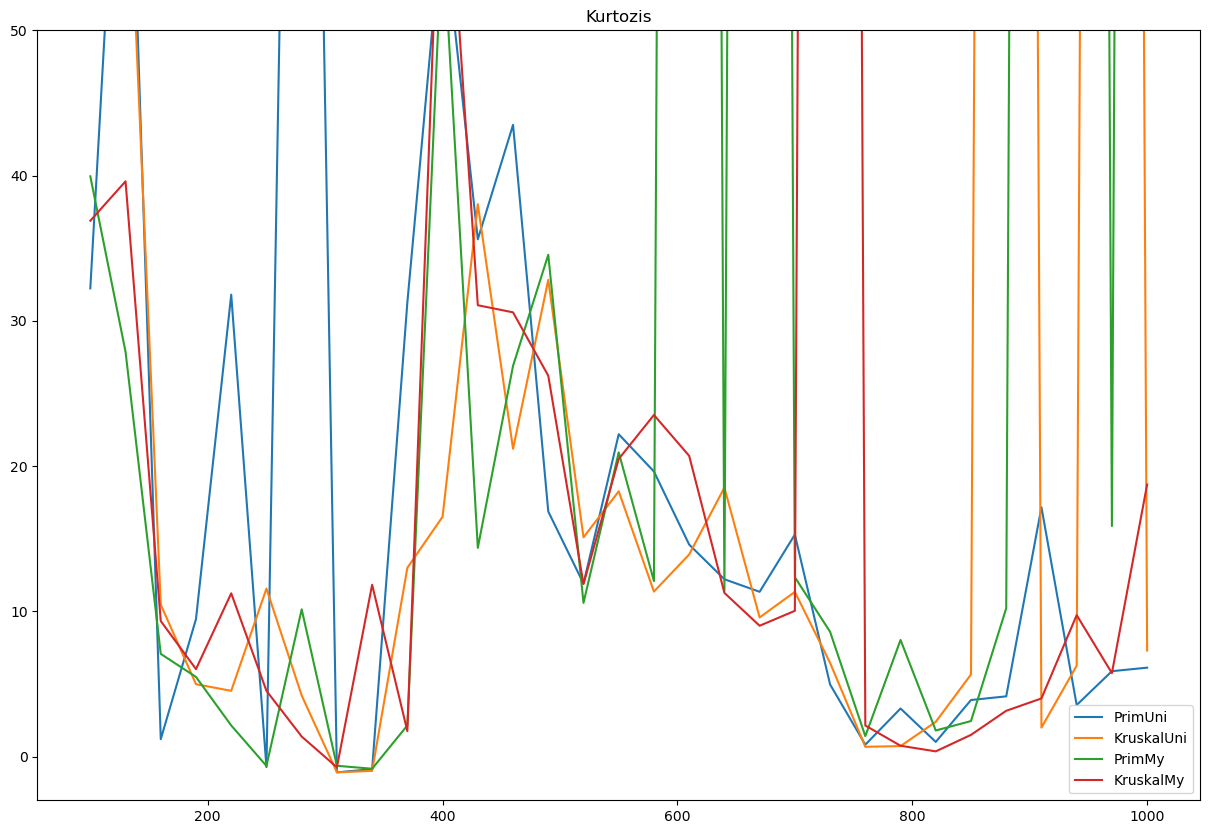

In [13]:
plot(N,[t.kurtozis for t in timesPrimUni], label="PrimUni")
plot(N,[t.kurtozis for t in timesKruskalUni], label="KruskalUni")
plot(N,[t.kurtozis for t in timesPrimMy], label="PrimMy")
plot(N,[t.kurtozis for t in timesKruskalMy], label="KruskalMy")
ylim(bottom=-3, top=50)
title("Kurtozis")
legend()
display(gcf())
clf()

### Probability distribution of weight

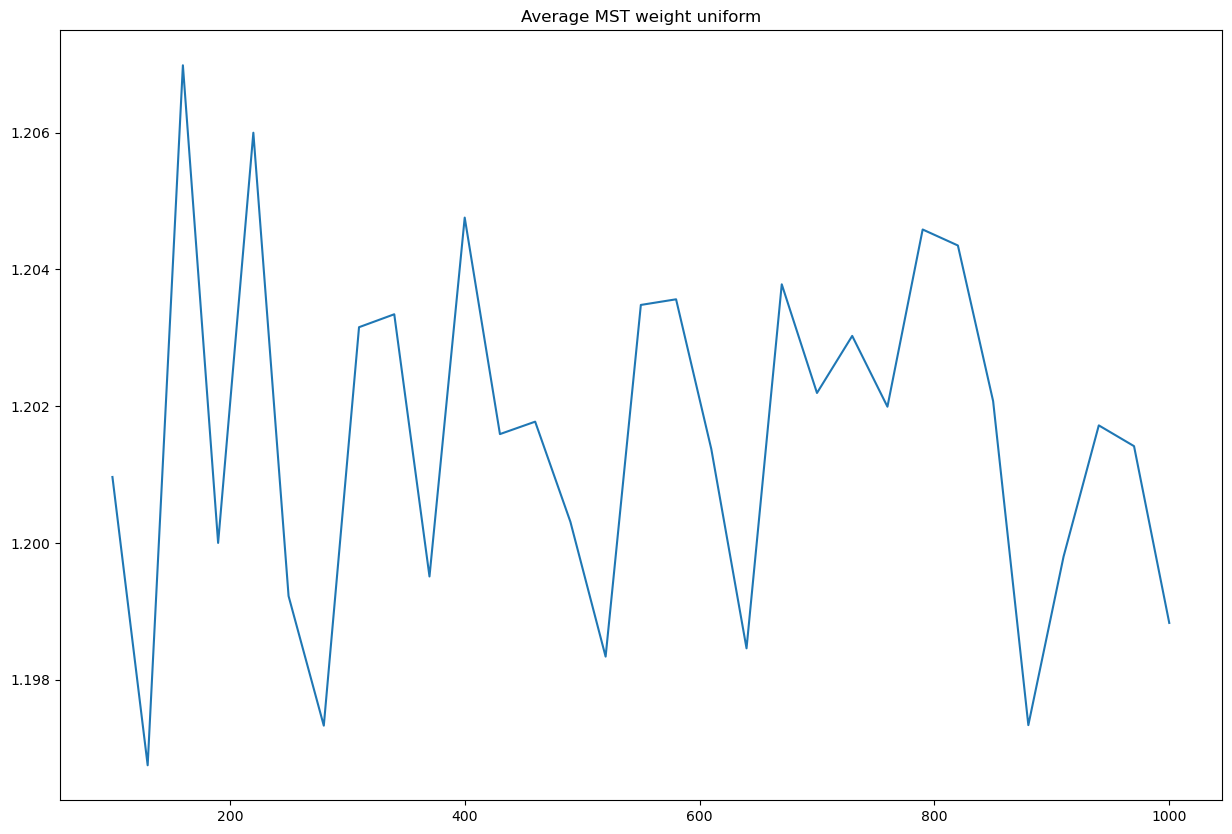

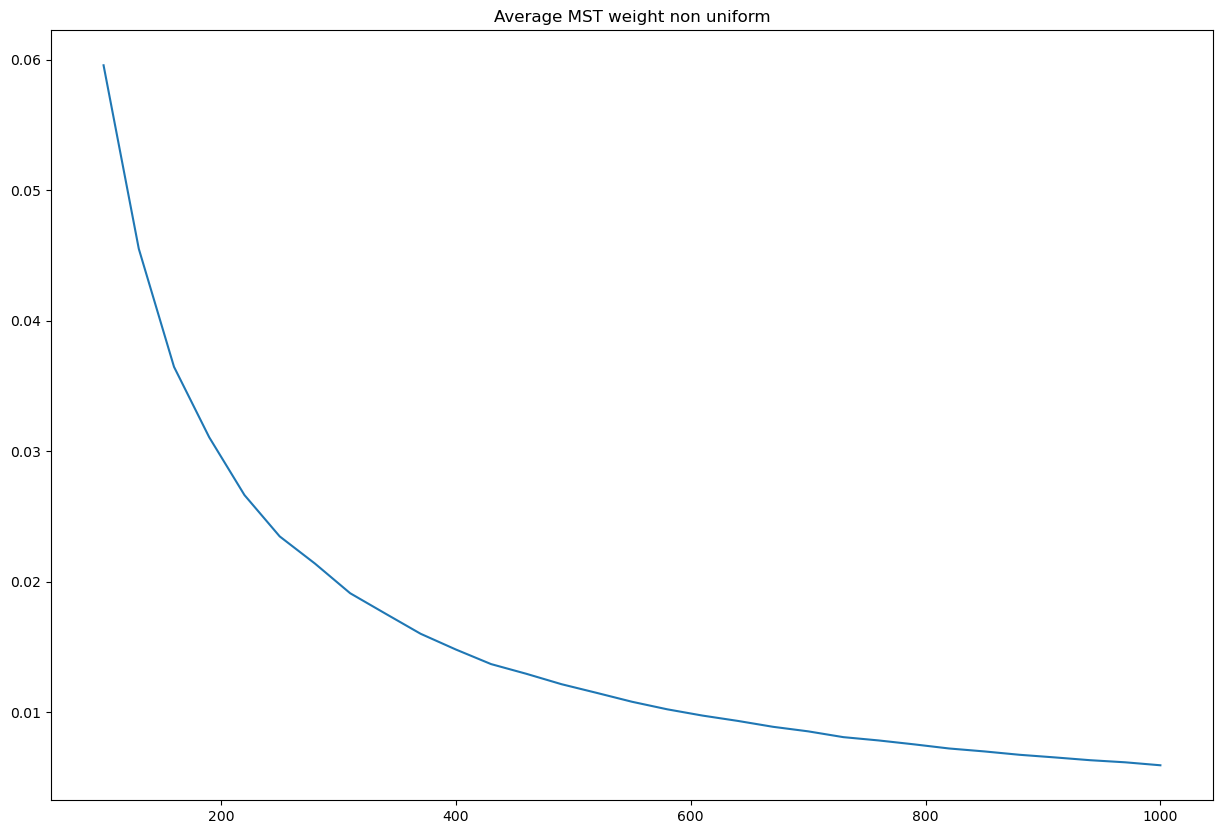

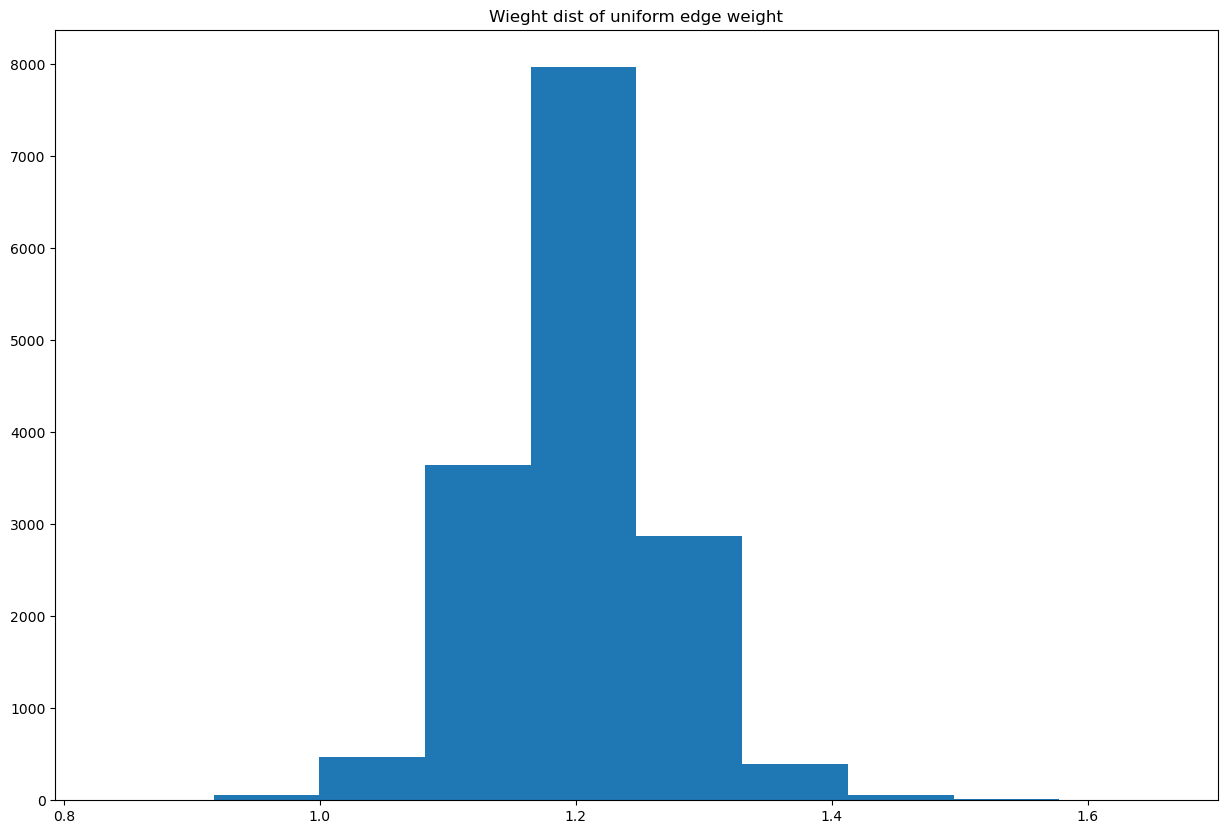

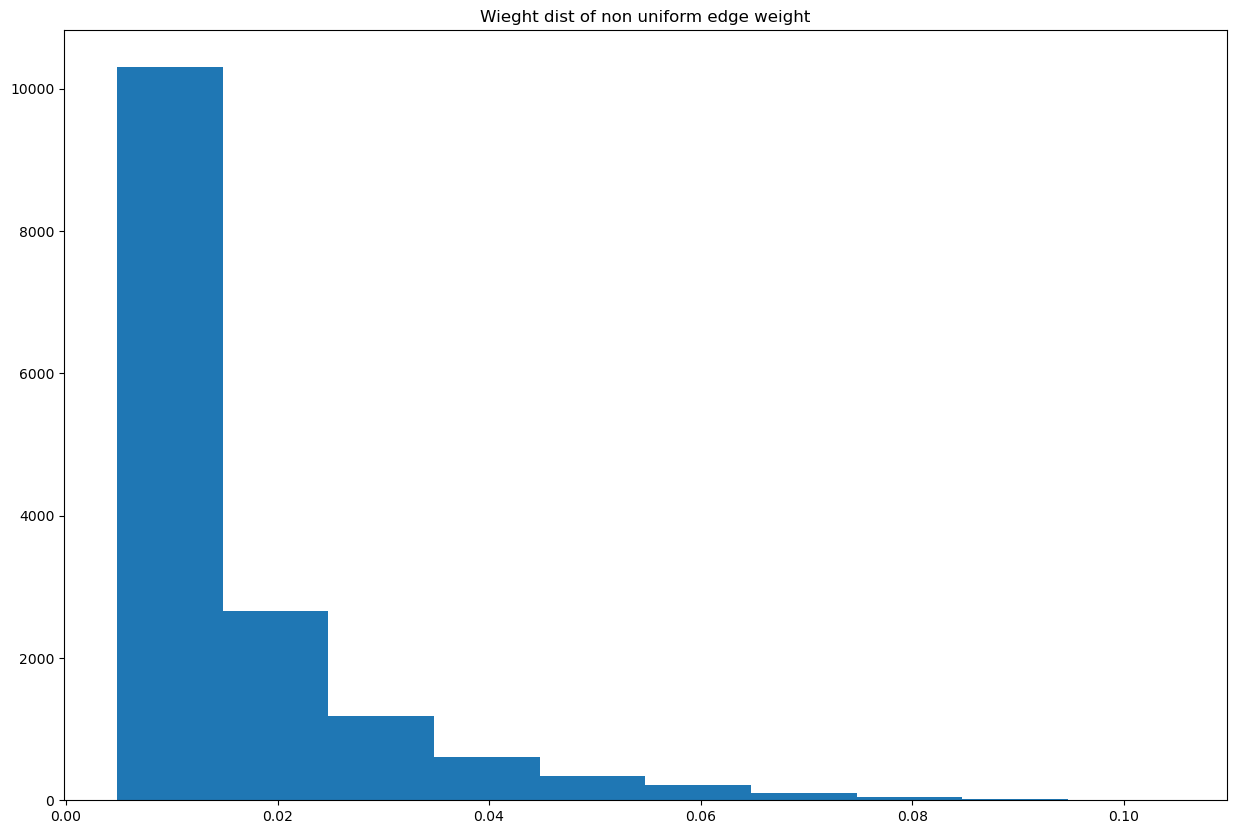

In [7]:
plot(N, [mean(getproperty.(vector, :weight)) for vector in recordsPrimUni])
title("Average MST weight uniform")
display(gcf())
clf()

plot(N, [mean(getproperty.(vector, :weight)) for vector in recordsPrimMy])
title("Average MST weight non uniform")
display(gcf())
clf()

hist([r.weight for r in collect(Iterators.flatten(recordsPrimUni))])
title("Wieght dist of uniform edge weight")
display(gcf())
clf()

hist([r.weight for r in collect(Iterators.flatten(recordsPrimMy))])
title("Wieght dist of non uniform edge weight")
display(gcf())
clf()